In [2]:
#importar librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyarrow as py
import fastparquet 


In [23]:
#cargar la base de datos
train = pd.read_parquet(r"C:\Users\berna\OneDrive\Documents\HENRY\LABS\Datathon\proyecto_ML\train.parquet")
test = pd.read_parquet (r"C:\Users\berna\OneDrive\Documents\HENRY\LABS\Datathon\proyecto_ML\test.parquet")

# Se procede a realizar el EDA (Exploracion y Analisis de Datos)

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346479 entries, 0 to 346478
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       346479 non-null  int64  
 1   url                      346479 non-null  object 
 2   region                   346479 non-null  object 
 3   region_url               346479 non-null  object 
 4   price                    346479 non-null  int64  
 5   type                     346479 non-null  object 
 6   sqfeet                   346479 non-null  int64  
 7   beds                     346479 non-null  int64  
 8   baths                    346479 non-null  float64
 9   cats_allowed             346479 non-null  int64  
 10  dogs_allowed             346479 non-null  int64  
 11  smoking_allowed          346479 non-null  int64  
 12  wheelchair_access        346479 non-null  int64  
 13  electric_vehicle_charge  346479 non-null  int64  
 14  come

In [7]:
train.head(22)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va
3,7041032577,https://phoenix.craigslist.org/nph/apa/d/phoen...,phoenix,https://phoenix.craigslist.org,1580,house,1469,3,2.0,1,...,0,0,0,w/d in unit,None,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,az
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,nashville,https://nashville.craigslist.org,995,apartment,700,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn
5,7047030967,https://dallas.craigslist.org/ndf/apa/d/lewisv...,dallas / fort worth,https://dallas.craigslist.org,1114,house,1649,3,2.0,1,...,0,0,0,w/d hookups,attached garage,https://images.craigslist.org/01212_1J89eIXG9R...,"Own this home with no deposits, fees, or money...",33.0198,-96.9925,tx
6,7047343269,https://worcester.craigslist.org/apa/d/worcest...,worcester / central MA,https://worcester.craigslist.org,1300,apartment,1150,3,1.0,1,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00x0x_cAeGUSUpyN...,NOTE: Available February 1st This is a COMPLE...,42.2470,-71.7872,ma
7,7046938522,https://wichita.craigslist.org/apa/d/andover-9...,wichita,https://wichita.craigslist.org,960,apartment,1050,3,2.0,1,...,0,0,0,w/d hookups,None,https://images.craigslist.org/00r0r_dhCoOqXTtE...,Beautiful 3 bedroom/2 bathroom apartment avail...,37.6985,-97.1179,ks
8,7019608647,https://scranton.craigslist.org/apa/d/wilkes-b...,scranton / wilkes-barre,https://scranton.craigslist.org,825,apartment,1200,3,1.5,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00000_boEpnuDAKX...,Newly renovated 1/2 double. 3 spacious bdrms w...,41.2689,-75.8453,pa
9,7043719542,https://boise.craigslist.org/apa/d/meridian-cl...,boise,https://boise.craigslist.org,1450,apartment,1230,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00N0N_bcKKdrttyR...,"Heron Village 51 E Blue Heron Ln, Meridian, ID...",43.6264,-116.3930,id


In [9]:
# Observamos las primeras 10 filas de que datos se componen.
train.head(10)

,id,url,region,region_url,price,type,sqfeet,beds,baths,cats_allowed,...,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,image_url,description,lat,long,state
0,7048013474,https://boise.craigslist.org/apa/d/very-nice-b...,boise,https://boise.craigslist.org,1350,house,1200,2,2.0,1,...,0,0,0,w/d in unit,detached garage,https://images.craigslist.org/00B0B_cPiJMEheZe...,Super cute row house in the Boise bench area. ...,43.5851,-116.2250,id
1,7043931179,https://cosprings.craigslist.org/apa/d/colorad...,colorado springs,https://cosprings.craigslist.org,1115,apartment,694,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00R0R_5XAoSKvfrz...,Windtree Apartment Homes currently has a spaci...,38.9137,-104.7800,co
2,7048254516,https://norfolk.craigslist.org/apa/d/virginia-...,norfolk / hampton roads,https://norfolk.craigslist.org,1129,apartment,900,2,2.0,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00f0f_3ZbTFrsHpZ...,Call Today! show contact info Indian Lakes ...,36.7922,-76.1643,va
3,7041032577,https://phoenix.craigslist.org/nph/apa/d/phoen...,phoenix,https://phoenix.craigslist.org,1580,house,1469,3,2.0,1,...,0,0,0,w/d in unit,None,https://images.craigslist.org/00f0f_aXV5Dkd5qk...,Cody Anderson Two Brothers Realty License #: S...,33.5623,-112.0560,az
4,7048588701,https://nashville.craigslist.org/apa/d/antioch...,nashville,https://nashville.craigslist.org,995,apartment,700,1,1.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00606_gYOGKClOHv...,To schedule a tour We now book our tour appoin...,36.0595,-86.6592,tn
5,7047030967,https://dallas.craigslist.org/ndf/apa/d/lewisv...,dallas / fort worth,https://dallas.craigslist.org,1114,house,1649,3,2.0,1,...,0,0,0,w/d hookups,attached garage,https://images.craigslist.org/01212_1J89eIXG9R...,"Own this home with no deposits, fees, or money...",33.0198,-96.9925,tx
6,7047343269,https://worcester.craigslist.org/apa/d/worcest...,worcester / central MA,https://worcester.craigslist.org,1300,apartment,1150,3,1.0,1,...,0,0,0,w/d in unit,off-street parking,https://images.craigslist.org/00x0x_cAeGUSUpyN...,NOTE: Available February 1st This is a COMPLE...,42.2470,-71.7872,ma
7,7046938522,https://wichita.craigslist.org/apa/d/andover-9...,wichita,https://wichita.craigslist.org,960,apartment,1050,3,2.0,1,...,0,0,0,w/d hookups,None,https://images.craigslist.org/00r0r_dhCoOqXTtE...,Beautiful 3 bedroom/2 bathroom apartment avail...,37.6985,-97.1179,ks
8,7019608647,https://scranton.craigslist.org/apa/d/wilkes-b...,scranton / wilkes-barre,https://scranton.craigslist.org,825,apartment,1200,3,1.5,0,...,0,0,0,w/d hookups,off-street parking,https://images.craigslist.org/00000_boEpnuDAKX...,Newly renovated 1/2 double. 3 spacious bdrms w...,41.2689,-75.8453,pa
9,7043719542,https://boise.craigslist.org/apa/d/meridian-cl...,boise,https://boise.craigslist.org,1450,apartment,1230,3,2.0,1,...,0,0,0,w/d in unit,carport,https://images.craigslist.org/00N0N_bcKKdrttyR...,"Heron Village 51 E Blue Heron Ln, Meridian, ID...",43.6264,-116.3930,id


In [29]:
# Analizamos algunas metricas estadisticas en cada variable.
train.describe()

,id,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,lat,long
count,3.464790e+05,3.464790e+05,3.464790e+05,346479.000000,346479.000000,346479.000000,346479.000000,346479.000000,346479.00000,346479.000000,346479.000000,344757.000000,344757.000000
mean,7.040988e+09,9.664420e+03,1.066326e+03,1.903189,1.480339,0.726803,0.707861,0.731738,0.08197,0.012792,0.048141,37.234363,-92.705415
std,8.802214e+06,4.703573e+06,2.018537e+04,3.162685,0.608246,0.445602,0.454746,0.443055,0.27432,0.112374,0.214065,5.550956,16.551071
min,7.003808e+09,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,-43.533300,-163.894000
25%,7.035988e+09,8.050000e+02,7.500000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,33.453100,-100.784000
50%,7.043325e+09,1.036000e+03,9.490000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,37.650100,-87.710800
75%,7.048431e+09,1.395000e+03,1.150000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,41.137900,-81.174600
max,7.051292e+09,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,102.036000,172.633000


In [11]:
# Mostramos el numero de filas y columnas de nuestro Dataframe.
train.shape

(346479, 22)

In [19]:
# Mostramos el tipo de variables que estamos trabajando en nuesto dataframe. 
# Observamos que tenmos de 3 tipos.
train.dtypes

id                           int64
url                         object
region                      object
region_url                  object
price                        int64
type                        object
sqfeet                       int64
beds                         int64
baths                      float64
cats_allowed                 int64
dogs_allowed                 int64
smoking_allowed              int64
wheelchair_access            int64
electric_vehicle_charge      int64
comes_furnished              int64
laundry_options             object
parking_options             object
image_url                   object
description                 object
lat                        float64
long                       float64
state                       object
dtype: object

In [27]:
# Analizamos las variable categoricas
train['parking_options'].value_counts()

off-street parking    115612
attached garage        36428
carport                35048
detached garage        15314
street parking         14370
no parking              2882
valet parking            143
Name: parking_options, dtype: int64

In [28]:
# Analizamos la variables categoricas
# Vemos que esta tiene mas de una categoria
train['laundry_options'].value_counts()

w/d in unit           118627
w/d hookups            67941
laundry on site        52949
laundry in bldg        32513
no laundry on site      3278
Name: laundry_options, dtype: int64

In [24]:
train['lat'].value_counts()

29.8754    1200
32.4779     714
39.4242     690
35.1653     607
30.3659     554
           ... 
28.9589       1
30.6253       1
48.1201       1
34.1697       1
42.8997       1
Name: lat, Length: 53822, dtype: int64

<AxesSubplot: >

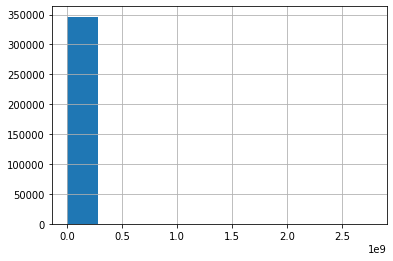

In [29]:
#hacemos un histograma de la variable "precio", para observar la distribucion de los datos.
price = np.random.normal(0, 0.1, 1000)
train['price'].hist()

<AxesSubplot: xlabel='baths', ylabel='Count'>

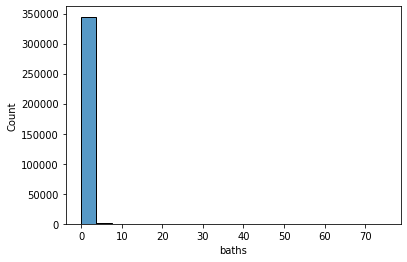

In [30]:
sns.histplot(x='baths', data=train, bins=20, kde=False)

(array([3.46478e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([0.00000000e+00, 1.84553817e+08, 3.69107633e+08, 5.53661450e+08,
        7.38215266e+08, 9.22769083e+08, 1.10732290e+09, 1.29187672e+09,
        1.47643053e+09, 1.66098435e+09, 1.84553817e+09, 2.03009198e+09,
        2.21464580e+09, 2.39919962e+09, 2.58375343e+09, 2.76830725e+09]),
 <BarContainer object of 15 artists>)

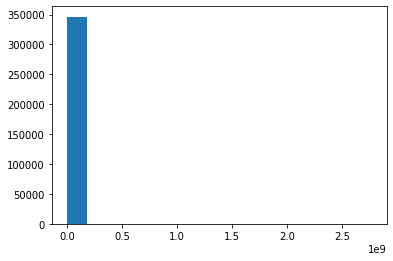

In [14]:
plt.hist (train["price"],15)

In [25]:
# Observamos la cantidad de datos nulos en cada variable.
# Vemos que en realidad no son muchos sin tener en cuanta las variables categoricas.
train.isnull().sum()

id                              0
url                             0
region                          0
region_url                      0
price                           0
type                            0
sqfeet                          0
beds                            0
baths                           0
cats_allowed                    0
dogs_allowed                    0
smoking_allowed                 0
wheelchair_access               0
electric_vehicle_charge         0
comes_furnished                 0
laundry_options             71171
parking_options            126682
image_url                       0
description                     2
lat                          1722
long                         1722
state                           0
dtype: int64

In [ ]:
#cambio de Variables categoricas a numericas
